## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Fast Fourier Transform (FFT)

## *** How does FFT work?

Watch the YouTube video below (strongly recommended):

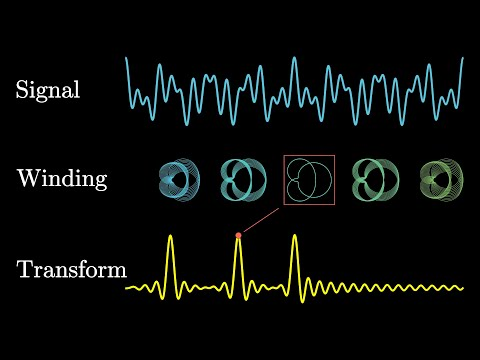

In [ ]:
from IPython.display import YouTubeVideo 
YouTubeVideo('spUNpyF58BY')

## Practice 1: FFT for Sine Function

### 1-1. Define freqeuncies (f) and angular frequencies (w) to generate a sine function

In [ ]:
# Frequencies (Hz)
f1 = 2
f2 = 3
f3 = 5
f4 = 21
f5 = 30

# Angular frequencies = 2pi*f (rad/s)
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2
w3 = 2*np.pi*f3
w4 = 2*np.pi*f4
w5 = 2*np.pi*f5

In [ ]:
print("f1 =",f1, "/ f2 =",f2, "/ f3 =",f3, "/ f4 =",f4, "/ f5 =",f5 )
print("w1 =",w1, "/ w2 =",w2, "/ w3 =",w3, "/ w4 =",w4, "/ w5 =",w5 )

### 1-2. Generate a sine function (discrete)

In [ ]:
t = np.arange(0,5,0.01)   # Sampling freq : 100 Hz, sampling time : 5 seconds
# t = np.arange(0,5,0.001)  # Sampling freq : 1000 Hz, sampling time : 5 seconds
x = 5*np.sin(w1*t) + 4*np.sin(w2*t) + 3*np.sin(w3*t) + 2*np.sin(w4*t) + 1*np.sin(w5*t)

t.shape

### 1-3. Check the sine function graph in time domain

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(t, x, 'b-')
plt.xlabel('t',fontsize=20)
plt.ylabel('x',fontsize=20)
# plt.xlim(1,2)
plt.grid()
plt.show()

### 1-4. Implement the FFT

#### 1-4-1. Calculate sampling frequency (Fs)
- Fs = Number of sample / sampling time

In [ ]:
Fs = int(len(t)/t[-1]) # sampling freq
Fs

#### 1-4-2. FFT implementation

In [ ]:
NFFT      =  len(x)                        # Number of Samples

k         =  np.arange(NFFT)               
f0        =  k * Fs / NFFT                 # Frequency range (double side)
f0        =  f0[range(math.trunc(NFFT/2))] # Frequency range (single side) - Applying Nyquist Theorem

Y         =  np.fft.fft(x)/NFFT            
Y         =  Y[range(math.trunc(NFFT/2))]
amp       =  2 * abs(Y)                    # FFT result 1: amplitude
phase     =  np.angle(Y) * 180/np.pi       # FFT result 2: phase

1-4-3. Plot FFT result

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(f0, amp, 'r.-', lw=1)
# plt.xlim(0, Fs/2)
plt.ylim(0)
plt.xticks(np.arange(0,(Fs/2)+1))
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.grid()

.

.

.

.

.

.

## Practice 2: FFT for Data

### 2-1. Load data

In [ ]:
# Load data without column names 
Data = pd.read_csv('https://github.com/Eunseob/purdue_me597/blob/main/ml_tutorial/ML1/ExampleData?raw=true', sep=',', header=None)
Data

### 2-2. Check the time domain graph

In [ ]:
plt.plot(Data.iloc[:,0], Data.iloc[:,1], 'b-') # Select one sensor signal 
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('acceleration(g)')
plt.xlim(0,0.2167)
plt.show()

### 2-3. Implement the FFT

#### 2-3-1. Declare time (t) and data (x)

In [ ]:
t = Data.iloc[:,0].values # Select a time   array of data
x = Data.iloc[:,1].values # Select a signal array of data

#### 2-3-2. Calculate sampling frequency (Fs)
- Fs = Number of sample / sampling time

In [ ]:
Fs = int(len(t)/0.21671) # sampling time: 0.21671s
Fs

#### 2-3-3. FFT implementation

In [ ]:
NFFT      =  len(x)                        # Number of Samples

k         =  np.arange(NFFT)               
f0        =  k * Fs / NFFT                 # Frequency range (double side)
f0        =  f0[range(math.trunc(NFFT/2))] # Frequency range (single side) - Applying Nyquist Theorem

Y         =  np.fft.fft(x)/NFFT            
Y         =  Y[range(math.trunc(NFFT/2))]
amp       =  2 * abs(Y)                    # FFT result 1: amplitude
phase     =  np.angle(Y) * 180/np.pi       # FFT result 2: phase

2-3-4. Plot FFT result

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(f0, amp, 'r.-')
plt.ylim(0)
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.grid()